In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


**Loading the data**



In [ ]:
# Importing libraries and data
import warnings
warnings.filterwarnings("ignore")

import pickle
# importing pandas for data manipulation using dataframes
import pandas as pd
# Importing numpy for data statistical analysis
import numpy as np
#Importing matplotlib for data visualization
import matplotlib.pyplot as plt
import random

In [ ]:
# we will import three pickle files- the test, training and validation datasets
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
# Let's check the shape of the data
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

**Image exploration**

we will explore the images class and see what the German traffic sign dataset looks like

36

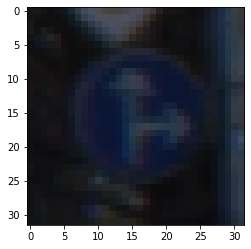

In [ ]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

**Data Preperation**


Data preparation is an important part of any data science project. Data preparation helps us to achieve better accuracy

In [ ]:
# We will start by shuffling the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# We will transform the data into grayscale and normalize it

X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

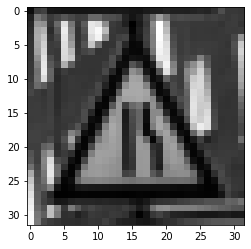

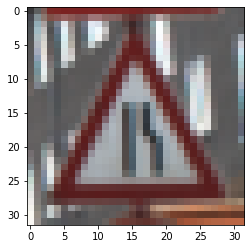

In [ ]:
# Now we will check the images following the grayscale conversion:
i=500
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

**Model training**

In this video we will train our model with the convolution neural network architecture.

In [ ]:
# We will start by importing the keras and sklearn libraries.
# We are importing Sequential, Conv2D, MaxPooling2D, Dense, Flatten, Dropouts, Adam, Tensorboard, and check output from keras.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from subprocess import check_output
from sklearn.model_selection import train_test_split

In [ ]:
image_shape = X_train_gray[i].shape

In [ ]:
image_shape

(32, 32, 1)

In [ ]:
# We will build the model
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(43, activation = 'sigmoid'))

We will compile the model. We will use sparse_categorical_crossentropy because we have 43 different clases. We are using Adam as an optimizer as it is appropriate for the sparse gradient problems. Its parameters require little tunning as they are computationally efficient and invariant to any diagnal rescaling of gradients

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False), metrics=['accuracy'])

In [ ]:
# We will train the model using cnn_model.fit function here batch size is 100 and epoch is 60
history = cnn_model.fit(X_train_gray_norm,
                       y_train,
                        batch_size=32,
                        epochs = 60,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/60
1088/1088 [==============================] - 35s 3ms/step - loss: 1.8982 - accuracy: 0.4744 - val_loss: 0.8205 - val_accuracy: 0.7980
Epoch 2/60
1088/1088 [==============================] - 3s 3ms/step - loss: 0.7174 - accuracy: 0.7810 - val_loss: 0.4552 - val_accuracy: 0.8660
Epoch 3/60
1088/1088 [==============================] - 3s 3ms/step - loss: 0.4859 - accuracy: 0.8521 - val_loss: 0.3573 - val_accuracy: 0.9054
Epoch 4/60
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3854 - accuracy: 0.8809 - val_loss: 0.3670 - val_accuracy: 0.8943
Epoch 5/60
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3211 - accuracy: 0.9024 - val_loss: 0.3265 - val_accuracy: 0.9120
Epoch 6/60
1088/1088 [==============================] - 3s 3ms/step - loss: 0.2826 - accuracy: 0.9126 - val_loss: 0.2794 - val_accuracy: 0.9179
Epoch 7/60
1088/1088 [==============================] - 3s 3ms/step - loss: 0.2531 - accuracy: 0.9211 - val_loss: 0.2716 - val_accuracy

**Model accuracy**

Once the training is complete the next step is to validate the model accuracy

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test, verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9429


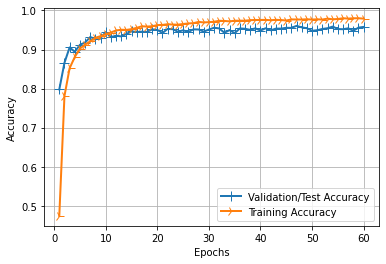

In [ ]:
# The training loss versus test loss graph look like
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

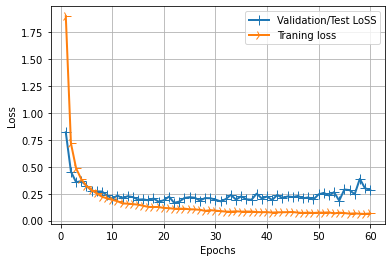

In [ ]:
#The training loss versus validation loss graph look like
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test LoSS')
line2 = plt.plot(epochs, loss_values, label='Traning loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

By observing these 2 graphs we are sure our model performing very well. We have built a traffic sign detector classsifier with 94% accuracy. The model has limited training loss, so the model is not overfitting

In [ ]:
# Let's save the model
cnn_model.save("trafficSign.h5")

In [ ]:
# Load the model
from keras.models import load_model
model = load_model("trafficSign.h5")

In [ ]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[ 43,  12,   0, ...,   0,   0,   0],
       [  0, 710,   1, ...,   0,   0,   0],
       [  0,   4, 741, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  75,   0,   0],
       [  0,   0,   0, ...,   0,  24,   0],
       [  0,   0,   0, ...,   0,   0,  82]])

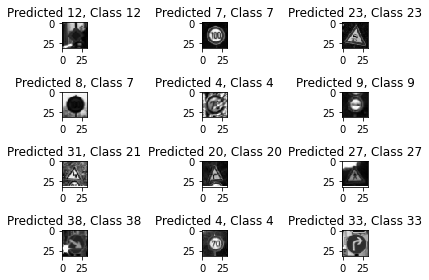

In [ ]:
# We can check the prediction
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

In [ ]:
# print the classification report
from sklearn.metrics import classification_report
predictions =model.predict_classes(X_test_gray)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.04      0.58      0.07        60
           1       0.32      0.99      0.48       720
           2       0.35      0.56      0.43       750
           3       0.75      0.08      0.14       450
           4       0.39      0.18      0.25       660
           5       0.14      0.02      0.03       630
           6       0.64      0.33      0.44       150
           7       0.27      0.07      0.11       450
           8       0.92      0.05      0.09       450
           9       0.66      0.86      0.75       480
          10       0.83      0.64      0.72       660
          11       0.34      0.92      0.49       420
          12       0.66      0.97      0.79       690
          13       0.60      0.97      0.74       720
          14       1.00      0.40      0.57       270
          15       0.60      0.03      0.05       210
          16       1.00      0.34      0.51       150
          17       1.00    